Biblioteki wykorzystane w zadaniu.

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np

Klasa Punkt.

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    #Definiowanie porównania
    def __lt__(self, other):
        if self.y == other.y:
            return self.x < other.x
        return self.y < other.y

Funkcja zwracjaąca oczytane z pliku punkty.

In [ ]:
def read_file(file):
    points = []
    with open(file, 'r') as file:
        lines = file.readlines()[1:]  # Pominięcie pierwszej linii
        for line in lines:
            x, y = map(float, line.strip().split())
            points.append(Point(x, y))
    return points

Funkcja sprawdzająca po której stronie odcinka b-c leży punkt a.

Zwraca:
  - "> 0" jeśli a leży na lewo od b-c
  - "< 0" jeśli a leży na prawo od b-c
  - "0" jeśli a, b, c są współliniowe


  Wzór na wyznacznik dla trzech punktów:


  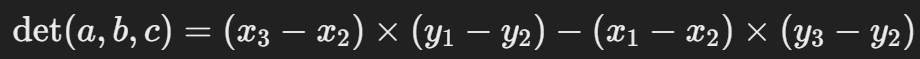

In [ ]:
def det(a, b, c):
    return (c.x - b.x) * (a.y - b.y) - (a.x - b.x) * (c.y - b.y)

Tworzenie otoczki wypukłej - metoda Jarvis'a



In [ ]:
def jarvis_hull(points):
  # Jeśli mniej niż 3 punkty, to nie możemy utworzyć otoczki
    number_of_points  = len(points)
    if number_of_points < 3:
        return []

    hull = []
    min_point = min(points, key=lambda p: (p.y, p.x))  # Punkt o najmniejszych współrzędnych y potem x (początek)

    # # Dodanie punktu o najmniejszych współrzędnych jako pierwszy punkt na otoczce
    hull.append(min_point)
    #Inicjalizacja następnego punktu do sprawdzenia jako pierwszy punkt z listy
    next_point = points[0]
    while True:
        for point_to_check in points[1:]:
            # Szukamy punktu, który jest najbardziej na lewo od odcinka utworzonego przez punkt na
            # otoczce i następny sprawdzany punkt
            if det(point_to_check , hull[-1], next_point) > 0:
                next_point = point_to_check

        if next_point == hull[0]:  # Sprawdzamy pierwszy dodany punkt
            break

        hull.append(next_point) # Dodajemy następny punkt otoczki
        next_index = points.index(next_point) # Indeks następnego punktu w liście
        next_index = (next_index + 1) % number_of_points   # Przechodzimy cyklicznie przez listę
        next_point = points[next_index] # Następny punkt do sprawdzenia staje się punktem o indeksie next_index

    return hull

Tworzenie otoczki wypukłej - metoda Graham'a

In [ ]:
def graham(points):
    if len(points) < 3:
        return points

    lowest_point = min(points, key=lambda p: (p.y, p.x))  # Znajdź punkt o najniższych współrzędnych y, a w przypadku równych y - najniższych x
    sorted_points = sort_points_by_polar_angle(points, lowest_point) #sortowanie wg najmniejszego kata
    convex_hull = [lowest_point, sorted_points[0], sorted_points[1]]

    # Szukamy trzech punktów tworzacych skret w lewo
    for point in sorted_points[2:]:
        while len(convex_hull) > 1 and orientation(convex_hull[-2], convex_hull[-1], point) != 2:
            convex_hull.pop()
        convex_hull.append(point)

    if convex_hull[-1] != lowest_point:
        convex_hull.append(lowest_point)

    return convex_hull

Obliczanie orientacji trzech punktów względem siebie:
* 0 - punkty wspoliniowe
* 1 - punkty tworza skret w lewo
* 2 - punkty nie tworza skretu w lewo

Według wzoru:


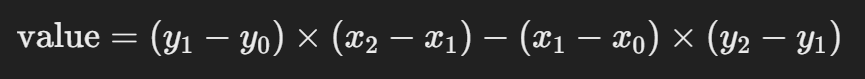

In [ ]:
def orientation(point0, point1, point2):
      value = (point1.y - point0.y) * (point2.x - point1.x) - (point1.x - point0.x) * (point2.y - point1.y)
      if value == 0:
          return 0
      elif value > 0:
          return 1
      else:
          return 2

Sortowanie punktu względem kąta polarnego względem danego punktu zakotwiczenia.

In [ ]:
def sort_points_by_polar_angle(points, anchor):
    return sorted(points, key=lambda x: (polar_angle(anchor, x), distance(anchor, x)))

Funkcja oblicza odległość między dwoma punktami na płaszczyźnie za pomocą normy euklidesowej.

In [ ]:
def distance(point0, point1):
    return np.linalg.norm(np.array([point1.x, point1.y]) - np.array([point0.x, point0.y]))

Funkcja obliczająca kąt polarny między dwoma punktami w przestrzeni dwuwymiarowej.

In [ ]:
def polar_angle(point0, point1):
    return np.arctan2(point1.y - point0.y, point1.x - point0.x)

Funkcja przedstawiająca graficznie wyniki.

In [ ]:
def show_points(points, color):
  x_values = [point.x for point in points]
  y_values = [point.y for point in points]

  plt.scatter(x_values, y_values, label='Points', color=color)

Program główny:

Zastowanie metody Jarvis'a
Dla pliku 'Ksztalt_1'


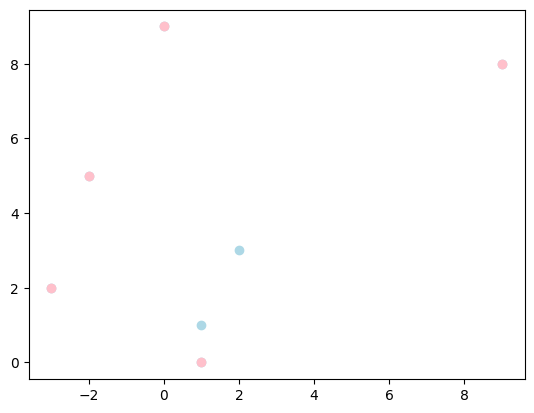

Dla pliku 'Ksztalt_2'


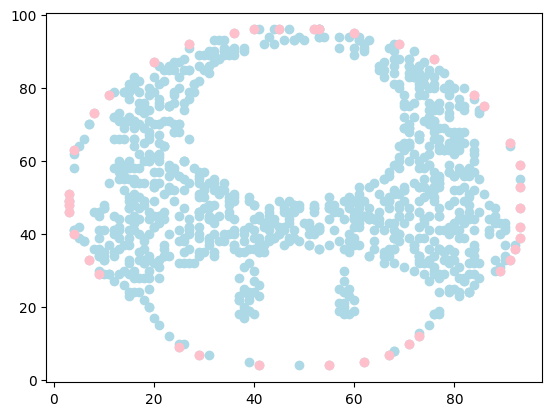

Dla pliku 'Ksztalt_2'


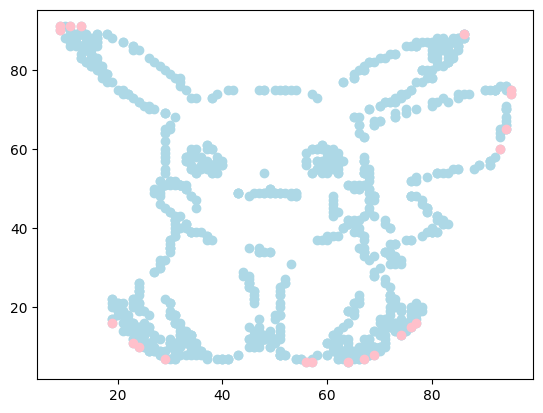

Zastosowanie metody Graham'a
Dla pliku 'Ksztalt_1'


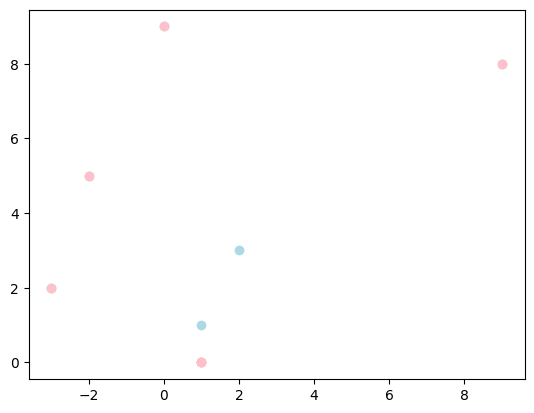

Dla pliku 'Ksztalt_2'


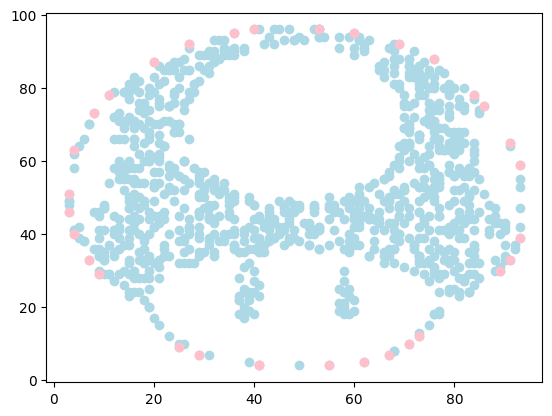

Dla pliku 'Ksztalt_3'


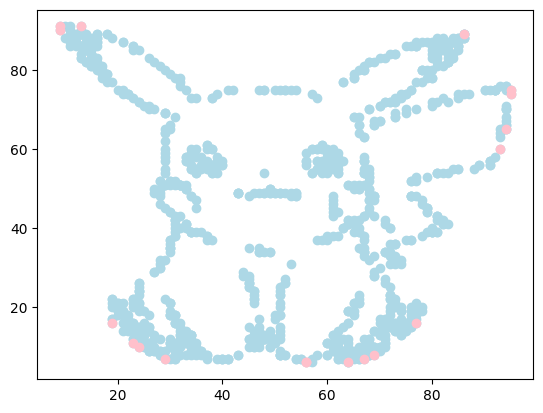

In [ ]:
def main():
  #Odczyt z pliku
  points = read_file("ksztalt_2.txt")
  points2 = read_file("ksztalt_3.txt")
  points3 = read_file("ksztalt_1.txt")

  print("Zastowanie metody Jarvis'a")
  print("Dla pliku 'Ksztalt_1'")
  show_points(points3, 'lightblue')
  result = jarvis_hull(points3)
  show_points(result, 'pink')
  plt.show()

  print("Dla pliku 'Ksztalt_2'")
  show_points(points, 'lightblue')
  result = jarvis_hull(points)
  show_points(result, 'pink')
  plt.show()

  print("Dla pliku 'Ksztalt_2'")
  show_points(points2, 'lightblue')
  result = jarvis_hull(points2)
  show_points(result, 'pink')
  plt.show()

  print("Zastosowanie metody Graham'a")
  print("Dla pliku 'Ksztalt_1'")
  show_points(points3, 'lightblue')
  result = graham(points3)
  show_points(result, 'pink')
  plt.show()

  print("Dla pliku 'Ksztalt_2'")
  show_points(points, 'lightblue')
  result = graham(points)
  show_points(result, 'pink')
  plt.show()

  print("Dla pliku 'Ksztalt_3'")
  show_points(points2, 'lightblue')
  result = graham(points2)
  show_points(result, 'pink')
  plt.show()

if __name__ == "__main__":
    main()